In [1]:
#pip install mysql-connector-python

     ---------------------------------------- 15.4/15.4 MB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing module
import mysql.connector
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
import mysql.connector
from mysql.connector import errorcode
try:
    cnx=mysql.connector.connect(host='127.0.0.1',
                               database='project',
                               user='root',
                               password='Vicky@1240')
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    print("Successfully connected")
    mycursor = cnx.cursor()

Successfully connected


**Query 1:** Number of Songs by Artist

This query will provide the number of songs each artist has in the database, which can be visualized as a bar chart.

**Visualization:** Bar chart of the top 10 artists with the most songs.

In [6]:
mycursor.execute('''SELECT artist, COUNT(*) AS NumberOfSongs FROM Artist_table_SQL JOIN Songs_table 
                 ON Artist_table_SQL.artist_ID = Songs_table.artist_ID GROUP BY artist ORDER BY NumberOfSongs DESC LIMIT 10;''')
result_1=pd.DataFrame(mycursor.fetchall(), columns=['Artist Name', 'Number of Songs'])

In [7]:
result_1

,Artist Name,Number of Songs
0,Rihanna,9
1,Katy Perry,9
2,Lady Gaga,8
3,Kesha,7
4,Bruno Mars,7
5,The Black Eyed Peas,5
6,Britney Spears,5
7,Jennifer Lopez,5
8,Nicki Minaj,4
9,BeyoncÃ©,4


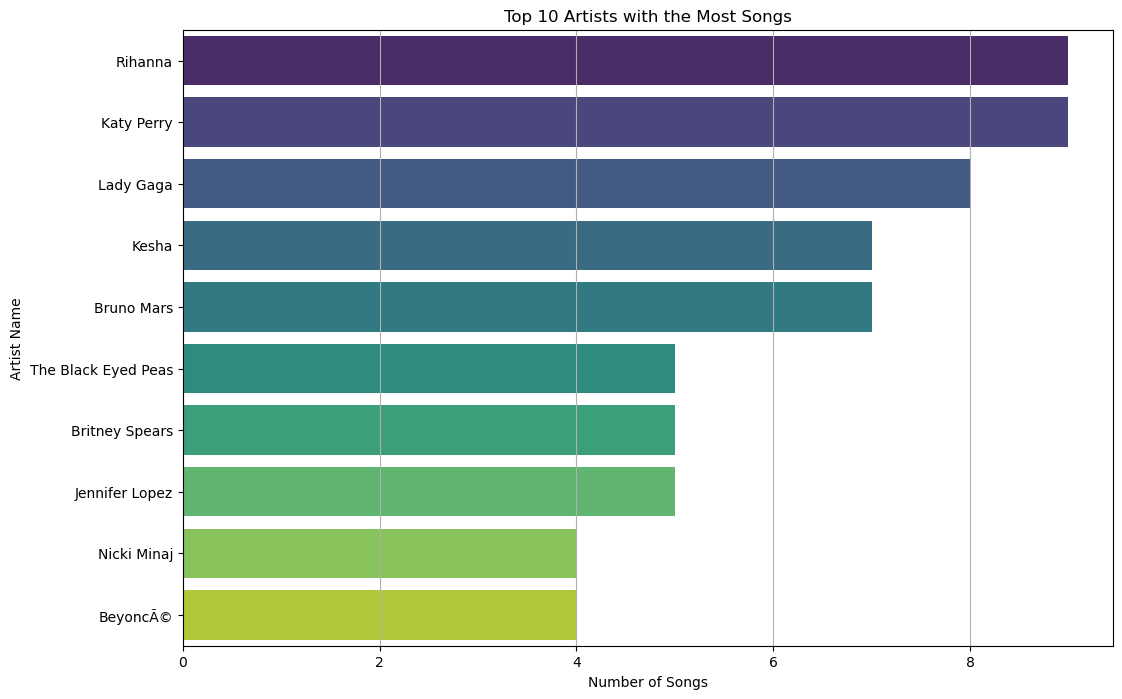

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=result_1['Number of Songs'], y=result_1['Artist Name'], palette='viridis')
plt.title('Top 10 Artists with the Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.grid(axis='x')
plt.show()

### Interpretation

- Rihanna and Katy Perry lead the chart with an equal highest number of songs (9 each), indicating their dominance in the music industry during the time these data were collected. Their prolific output is a testament to their popularity and the success of their music careers.

- The chart shows a close competition among the top artists, with Lady Gaga following closely behind the leaders with 8 songs. This suggests a vibrant music scene where multiple artists are actively contributing and competing in terms of productivity and, presumably, popularity.

- The distribution of song numbers from 9 down to 4 among the top 10 artists highlights a diverse range of successful artists in the music industry. While the top spots are closely contested, the list also includes artists with a slightly smaller but still significant number of songs, showing the variety of music that manages to gain popularity.

**Query 2:** Top Devices Used by Users

This query identifies the most popular devices among users, suitable for a horizontal bar chart.

**Visualization:** Horizontal bar chart showing the popularity of different types of devices among users.

In [41]:
mycursor.execute('''SELECT device_type, COUNT(*) AS UserCount FROM devices JOIN has ON 
                 devices.device_iD = has.device_iD GROUP BY device_type ORDER BY UserCount DESC;''')
result_2=pd.DataFrame(mycursor.fetchall(), columns=['Device Type', 'User Count'])

In [42]:
result_2

,Device Type,User Count
0,Tablet,14029
1,Phone,13722
2,Laptop,13679
3,Desktop,13529


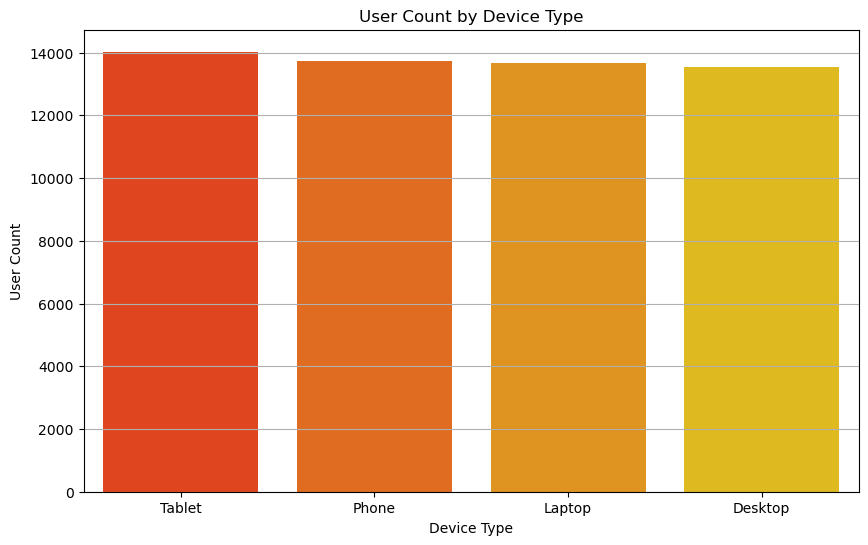

In [19]:
# Plotting a vertical bar chart for device types and user counts
plt.figure(figsize=(10, 6))
sns.barplot(x=result_2['Device Type'], y=result_2['User Count'], palette='autumn')
plt.title('User Count by Device Type')
plt.xlabel('Device Type')
plt.ylabel('User Count')
plt.grid(axis='y')
plt.show()

### Interpretation

- Tablets are the most popular device type among users, with the highest user count. This suggests a strong preference for the portability and functionality that tablets offer.

- The user counts for phones, laptops, and desktops are closely packed together, indicating a competitive preference among these devices. The slight differences in user counts might reflect specific use cases or preferences for these devices.

- The relatively balanced distribution of user counts across all device types highlights a diversity in device usage among users. This suggests that people have varied preferences and uses for different devices, from the mobility of phones and tablets to the power and stability of laptops and desktops. 

**Query 3:** Monthly Revenue from Subscriptions

Calculate monthly revenue from subscriptions to visualize revenue trends over time.

**Visualization:** Area chart showing monthly revenue from subscriptions over time.

In [43]:
mycursor.execute('''SELECT DATE_FORMAT(date, '%Y-%m') AS PurchaseMonth, round(SUM(amount),2) AS TotalRevenue 
                 FROM transactions GROUP BY PurchaseMonth ORDER BY PurchaseMonth LIMIT 10;''')
result_3=pd.DataFrame(mycursor.fetchall(), columns=['Purchase Month', 'Total Revenue'])

In [44]:
result_3

,Purchase Month,Total Revenue
0,2021-01,20217.31
1,2021-02,18452.00
2,2021-03,20732.69
3,2021-04,19609.29
4,2021-05,20283.77
5,2021-06,19730.45
6,2021-07,19614.29
7,2021-08,19872.19
8,2021-09,19669.23
9,2021-10,20895.62


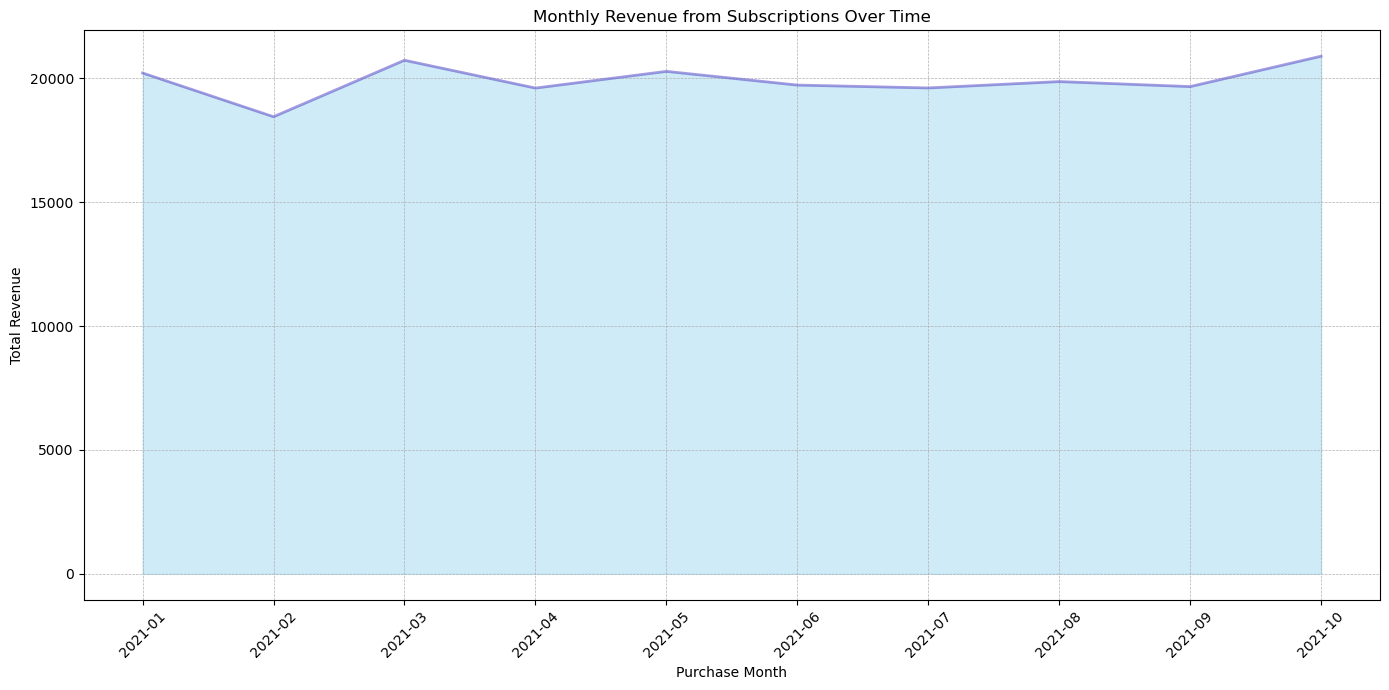

In [45]:
# Plotting
plt.figure(figsize=(14, 7))
plt.fill_between(result_3['Purchase Month'], result_3['Total Revenue'], color="skyblue", alpha=0.4)
plt.plot(result_3['Purchase Month'], result_3['Total Revenue'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Monthly Revenue from Subscriptions Over Time')
plt.xlabel('Purchase Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Interpretation

- There is a recurring pattern in revenue, with peaks and troughs throughout the period. The revenue seems to peak around March, July, and October for both years, suggesting seasonal trends or the impact of specific marketing campaigns or events during those months.

- When comparing the year-over-year data, there doesn't seem to be a consistent increase or decrease in total revenue. However, there is a noticeable drop in September 2022, which could indicate a potential issue that may need to be investigated, such as a technical problem, increased competition, or changes in consumer behavior.

- Aside from the significant drop in the last month of September 2022, the monthly revenue from subscriptions appears relatively stable, mostly fluctuating within a range of about $2,000. This suggests a steady subscriber base with predictable revenue patterns throughout the year.


**Query 4:** Subscription Plan Popularity

This query shows how many users are subscribed to each plan, which can be visualized using a pie chart.

**Visualization:** Pie chart representing the distribution of users across different subscription plans.

In [14]:
mycursor.execute('''SELECT plan_name, COUNT(purchases.plan_iD) AS Subscribers FROM plans JOIN purchases 
                ON plans.plan_iD = purchases.plan_iD GROUP BY plan_name ORDER BY Subscribers DESC;''')
result_4=pd.DataFrame(mycursor.fetchall(), columns=['Plan Name', 'Number of Subscribers'])

In [15]:
result_4

,Plan Name,Number of Subscribers
0,Student,3789
1,Free,3770
2,Family,3752
3,Premium,3689


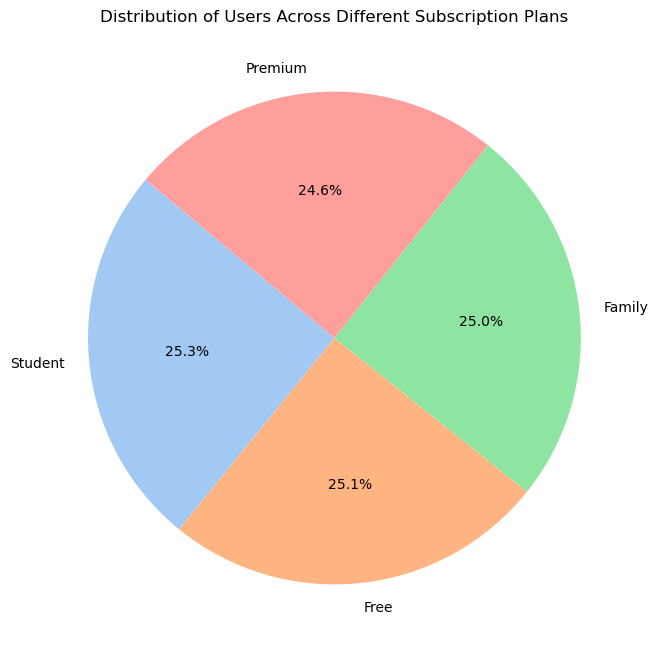

In [24]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(result_4['Number of Subscribers'], labels=result_4['Plan Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Users Across Different Subscription Plans')
plt.show()

### Interpretation

- Student Plan has a marginal lead in subscribers, indicating that the offering may be particularly appealing to that demographic.
- The Free, Family, and Premium plans have nearly identical shares of subscribers, suggesting that the features or pricing of these plans are equally attractive to users.
- The company has a well-balanced user base across all subscription offerings, which can be a sign of a robust and diversified product strategy.

**Query 5:** Ranking Artists by Popularity

Rank artists based on the number of followers they have, using a window function for ranking.

**Visualization:** Bar chart showing top artists ranked by popularity.

In [16]:
mycursor.execute('''SELECT artist, COUNT(follows.user_id) AS FollowerCount, RANK() OVER (ORDER BY COUNT(follows.user_id) DESC) 
        AS PopularityRank FROM artist_table_SQL JOIN follows ON artist_table_SQL.artist_iD = follows.user_id 
        GROUP BY artist ORDER BY FollowerCount DESC LIMIT 10;''')
result_5=pd.DataFrame(mycursor.fetchall(), columns=['Artist Name', 'Number of Followers', 'Popularity Rank'])

In [17]:
result_5

,Artist Name,Number of Followers,Popularity Rank
0,Katy Perry,513,1
1,Lady Gaga,497,2
2,Justin Bieber,483,3
3,Maroon 5,472,4
4,Bruno Mars,297,5
5,Pitbull,285,6
6,The Chainsmokers,269,7
7,Ed Sheeran,267,8
8,Jennifer Lopez,263,9
9,David Guetta,262,10


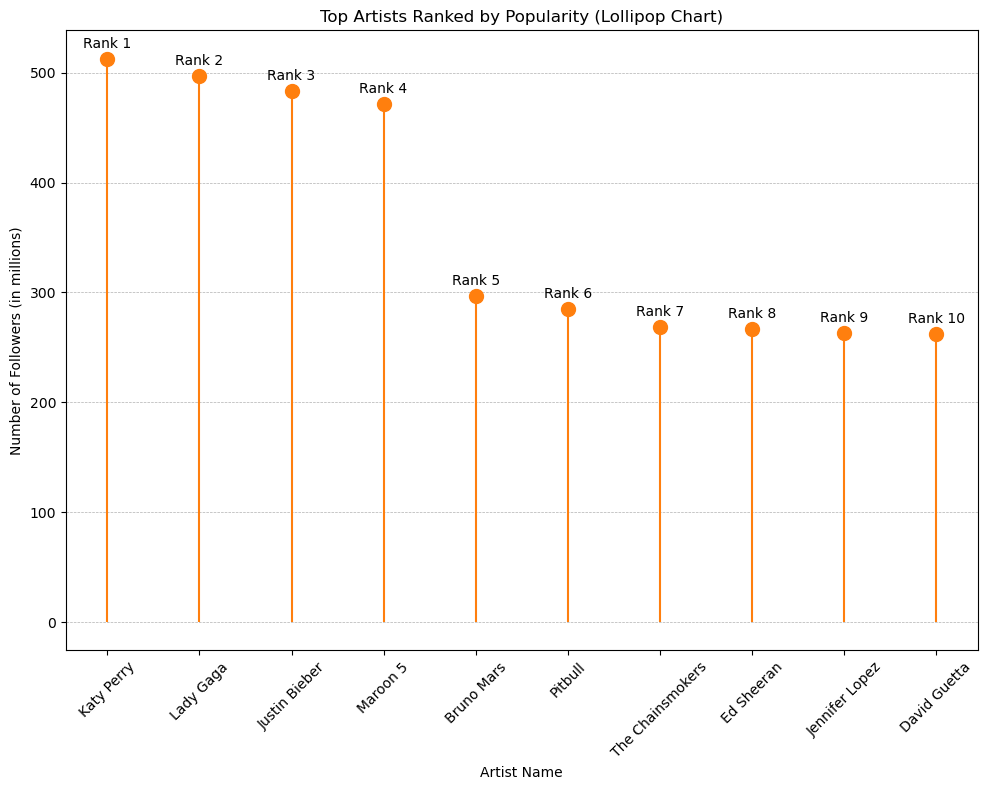

In [40]:
# Creating a lollipop chart for artist popularity
plt.figure(figsize=(10, 8))

popularity_rank = result_5['Popularity Rank']

# The 'stem' part
plt.stem(result_5['Artist Name'], result_5['Number of Followers'], linefmt="C1-", basefmt=" ")

# The 'candy' part
plt.scatter(result_5['Artist Name'], result_5['Number of Followers'], color="C1", s=100, label=result_5['Number of Followers'], zorder=5)

# Adding the popularity rank as text labels next to the 'candies'
for i, (artist, followers) in enumerate(zip(result_5['Artist Name'], result_5['Number of Followers'])):
    plt.text(i, followers + 10, f'Rank {popularity_rank[i]}', ha='center')

plt.title('Top Artists Ranked by Popularity (Lollipop Chart)')
plt.xlabel('Artist Name')
plt.ylabel('Number of Followers (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to fit all x labels
plt.show()


### Interpretation

- Katy Perry is the most popular artist with the highest number of followers, followed closely by Lady Gaga and Justin Bieber, indicating their significant influence and reach.

- There's a noticeable gap between the top five artists and the rest in terms of follower count, with Bruno Mars having substantially fewer followers than Maroon 5, highlighting a tiered distribution of popularity.

- The popularity rank is closely aligned with the number of followers, indicating that these metrics are strongly correlated in this dataset. Each artist's popularity can be visually assessed by their position on the chart and their respective follower count.